# Einstieg in Keras

## Einleitung 
Dieses Notebook ist so gestaltet, das je ein Teil der Hauptfunktionalitäten von Keras theoretisch erklärt und dann praktisch verdeutlich wird. Zur Verdeutlichung wurde hier ein Teil des MNIST Datensatzes mit handgeschriebenen Zahlen genutzt. Am Ende des Notebooks steht ein trainiertes Keras Model das handgeschriebene Zahlen identifizieren kann.

Der erste Codeblock dient lediglich zum Laden und Aufbereiten der Bilddateien. 

In [1]:
import numpy as np
import pandas as pd
import os
import PIL.Image as Image

from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
import matplotlib.pyplot as plt

def getData(number_img, csv_path):
    '''
    Read images and save to array
    :param number_img: the number of images to load
    :param csv_path: the path for CSV in which the image paths are stored
    :return: image_array, classes_array
    '''
    data = pd.read_csv(csv_path)

    image_paths = data['filename'][:number_img]

    #Create class vectors with following shape: [0,0,0,0,0,0,0,0,0,1] --> Represents class for number 9
    classes = data['label'][:number_img]
    classes_vecs = np.array([np.zeros(10) for classes in classes])
    for class_nr in range(len(classes)):
        classes_vecs[class_nr][classes[class_nr]] = 1

    images = []
    for i in range(len(image_paths)):
        path = os.path.join('data/Images/train', image_paths[i])
        img = Image.open(path).convert('RGBA')
        arr = np.array(img)
        images.append(arr)

    images = np.array(images)
    return images, classes_vecs

images, classes = getData(10000, "data/train.csv")
trainImages = images[:9940]
trainClasses = classes[:9940]
testImages = images[9941:]
testClasses = classes[9941:]

Using TensorFlow backend.


## 1 Das Model / Sequential

In Keras wird das Model des neuronalen Netzes Sequential genannt. Es stellt einen Stack aus Netzschichten dar. 
Zu einem Model können nach und nach die einzelnen Schichten via add Befehl hinzugefügt oder direkt im Konstruktor übergeben werden. 

Zum Beispiel: 

> Sequential([

>         Dense(64, input_dim=20, activation='relu'),
>         Dense(10, activation='softmax')
        
>     ])
    

> model = Sequential()

>model.add(Dense(64, input_dim=20, activation='relu'))

>model.add(Dense(10, activation='softmax'))

## 2 Layers
Übersicht hier: https://keras.io/layers/core/ mit allen Parametern. Hier werden nur einige Schichten kurz genannt und einige Parameter aufgelistet, die zur Erstellung des Beispieles notwendig sind.

### 2.1 Dense
Fully-Connected-Layer. 

> keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

> -->Dense(120, activation='relu')

### 2.2 Flatten
Übergang von z.B. Convolutional Layer 2D zu Fully-Connected-Layer. 

Beispiel: 

> model.output_shape == (None, 64, 32, 32)

> model.add(Flatten())

> model.output_shape == (None, 65536)

### 2.3 Pooling
Pooling / Downsampling. 

> keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid')
 
> -->MaxPooling2D(pool_size=(2, 2))

### 2.4 Convolutional
> keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

> -->Conv2D(6, (9, 9), activation="relu", input_shape=images[0].shape, kernel_initializer=Initialisierungsmethode)

Mit diesem Wissen können wir recht einfach ein Keras-Model für ein Convolutional Network erstellen: 

In [2]:
modelK = Sequential([
        Conv2D(6, (9, 9), activation="relu", input_shape=images[0].shape, kernel_initializer='random_uniform'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, (9, 9), activation="relu", input_shape=images[0].shape, kernel_initializer='random_uniform'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu', kernel_initializer='random_uniform'),
        Dense(100, activation='relu', kernel_initializer='random_uniform'),
        Dense(10, activation='softmax', kernel_initializer='random_uniform')
    ])


## Kompilierung des Models

Bevor das Model trainiert werden kann, muss es durch den Befehl compile kompiliert / konfiguriert werden. Hierbei müssen einige wichtige Informationen mit übergeben werden.
Der compile Befehl ist wie folgt aufgebaut: 

> model.compile(loss=Loss-Function,
>                  optimizer=Optimierer,
>                  metrics=Metric)

### 3.1 Loss
Hier alle in Keras verfügbaren Loss-Funktionen: 
https://keras.io/losses/

### 3.2 Optimierer
Optimierungsfunktionen, z.B. Stochastic Gradient Descent --> SGD oder adam

Alle verfügbaren Optimierungsfunktionen: 
https://keras.io/optimizers/

### 3.3 Metrics
Misst die Leistung des Netzes, z.B. accuracy

Alle Verfügbaren Metriken: 
https://keras.io/metrics/

Na dann kompolieren wir mal unser Model: 

In [3]:
modelK.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

## Trainieren des Models

Nach der Kompilierung kann das Model angepasst / trainiert werden, dafür gibt es den fit Befehl. 

> model.fit(trainings_input, trainings_output, epochs=Trainingsdurchlaeufe, batch_size=Batchgroesse)

Das Trainieren unseres aktuellen Models mit vorher aufbereiteten Daten ist also ein Eizeiler: 

In [4]:
modelK.fit(trainImages, trainClasses, epochs=5, batch_size=100)

Epoch 1/5
9940/9940 [==============================] - 11s - loss: 0.7989 - acc: 0.7403    
Epoch 2/5
9940/9940 [==============================] - 11s - loss: 0.2689 - acc: 0.9156    
Epoch 3/5
9940/9940 [==============================] - 10s - loss: 0.1873 - acc: 0.9416    
Epoch 4/5
9940/9940 [==============================] - 10s - loss: 0.1383 - acc: 0.9551    - ETA: 1s - loss: 0
Epoch 5/5
9940/9940 [==============================] - ETA: 0s - loss: 0.1197 - acc: 0.959 - 11s - loss: 0.1199 - acc: 0.9596    


## Evaluieren / Vorhersagen

Letzendlich wollen wir natürlich unser Model testen und Vorhersagen machen. Zum Überprüfen des Models gibt es den evaluate Befehl. 
> model.evaluate(input_daten, output_daten, batch_size=batchgroesse )

In [5]:
evaluation = modelK.evaluate(np.array(testImages), testClasses, batch_size=100)
print("Loss: ", evaluation[0])
print("Accuracy: ", evaluation[1])

59/59 [==============================] - 0s
Loss:  0.288096547127
Accuracy:  0.898305058479


Vorhersagen treffen geht in Keras ganz einfach mit dem Befehl predict
> model.predict(input_daten)

Schon wieder ein Einzeiler: 

In [6]:
predictions = modelK.predict(np.array(testImages))

## Visualisieren

Abschließend visualisieren wir unsere Vorhersagen.

In [7]:
def plotSampleImages(images, labels):
    '''
    Plot all predicted numbers
    :param images: the images to plot
    :param labels: the labels which were predicted
    :return: nothing :O
    '''
    image_data_sorted = [[],[],[],[],[],[],[],[],[],[]]
    for i in range(len(labels)):
        image_data_sorted[labels[i]].append(images[i])
    fig, axes = plt.subplots(nrows=15, ncols=10)
    np.vectorize(lambda axes:axes.axis('off'))(axes)
    for image_class in range(10):
        axes[0, image_class].set_title(image_class)
        for image in range(len(image_data_sorted[image_class])):
            axes[image, image_class].axis('off')
            axes[image, image_class].imshow((image_data_sorted[image_class][image])/255)

    plt.show()

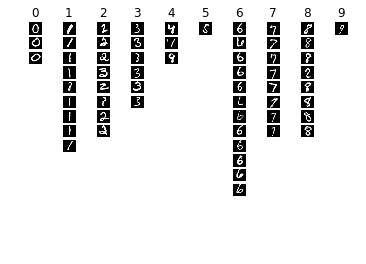

In [8]:
numbers = []
for pred in predictions:
    numbers.append(np.argmax(pred))

plotSampleImages(testImages, numbers)